<a href="https://colab.research.google.com/github/assemayman1202-git/DA-intern-Time-Series-Analysis-task/blob/main/time_series_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
df = pd.read_csv('Stock Prices Data Set.csv')

stock prices dataset

In [62]:
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943.0
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957.0
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711.0
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061.0
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391.0
...,...,...,...,...,...,...,...
323701,CF,2016-08-16,23.2900,23.4400,23.0500,23.2000,6010153.0
323702,CHD,2016-08-16,49.8350,50.0700,49.6250,49.6450,1626834.0
323703,CHK,2016-08-16,5.6000,5.9400,5.4200,5.9100,77068556.0
323704,CHRW,2016-08-16,69.2500,70.0100,68.9800,69.8200,1416484.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323706 entries, 0 to 323705
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  323706 non-null  object 
 1   date    323706 non-null  object 
 2   open    323696 non-null  float64
 3   high    323699 non-null  float64
 4   low     323699 non-null  float64
 5   close   323706 non-null  float64
 6   volume  323705 non-null  float64
dtypes: float64(5), object(2)
memory usage: 17.3+ MB


change column type to date

In [66]:
df['date'] = pd.to_datetime(df['date'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323706 entries, 0 to 323705
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  323706 non-null  object        
 1   date    323706 non-null  datetime64[ns]
 2   open    323696 non-null  float64       
 3   high    323699 non-null  float64       
 4   low     323699 non-null  float64       
 5   close   323706 non-null  float64       
 6   volume  323705 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.3+ MB


In [68]:
print(df['symbol'].nunique())

498


Remove missing values

In [69]:
df.dropna(inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323695 entries, 0 to 323704
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  323695 non-null  object        
 1   date    323695 non-null  datetime64[ns]
 2   open    323695 non-null  float64       
 3   high    323695 non-null  float64       
 4   low     323695 non-null  float64       
 5   close   323695 non-null  float64       
 6   volume  323695 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 19.8+ MB


In [72]:
df

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943.0
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957.0
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711.0
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061.0
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391.0
...,...,...,...,...,...,...,...
323690,CFG,2016-08-16,23.3500,23.6650,23.3210,23.3900,4756536.0
323691,CF,2016-08-16,23.2900,23.4400,23.0500,23.2000,6010153.0
323692,CHD,2016-08-16,49.8350,50.0700,49.6250,49.6450,1626834.0
323693,CHK,2016-08-16,5.6000,5.9400,5.4200,5.9100,77068556.0


In [75]:
AAPL = df[df['symbol'] == 'AAPL']

Identify that AAPL is the 2nd largest stock price by volume

In [83]:
df.groupby('symbol')['volume'].sum().sort_values(ascending=False)

,volume
symbol,
BAC,6.012200e+10
AAPL,3.542554e+10
GE,2.710169e+10
FB,2.329666e+10
MSFT,2.281068e+10
...,...
AZO,1.758306e+08
UA,1.356853e+08
WLTW,1.276969e+08


AAPL Volume over years

Text(0.5, 1.0, 'AAPL Volume over years')

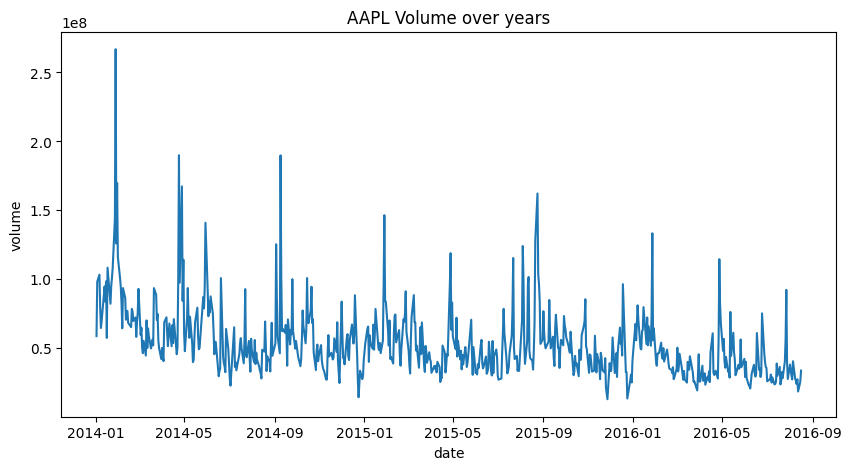

In [142]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(AAPL['date'], AAPL['volume'])
ax.set_xlabel('date')
ax.set_ylabel('volume')
ax.set_title('AAPL Volume over years')


decompose volume into trend,seasonal and residuals


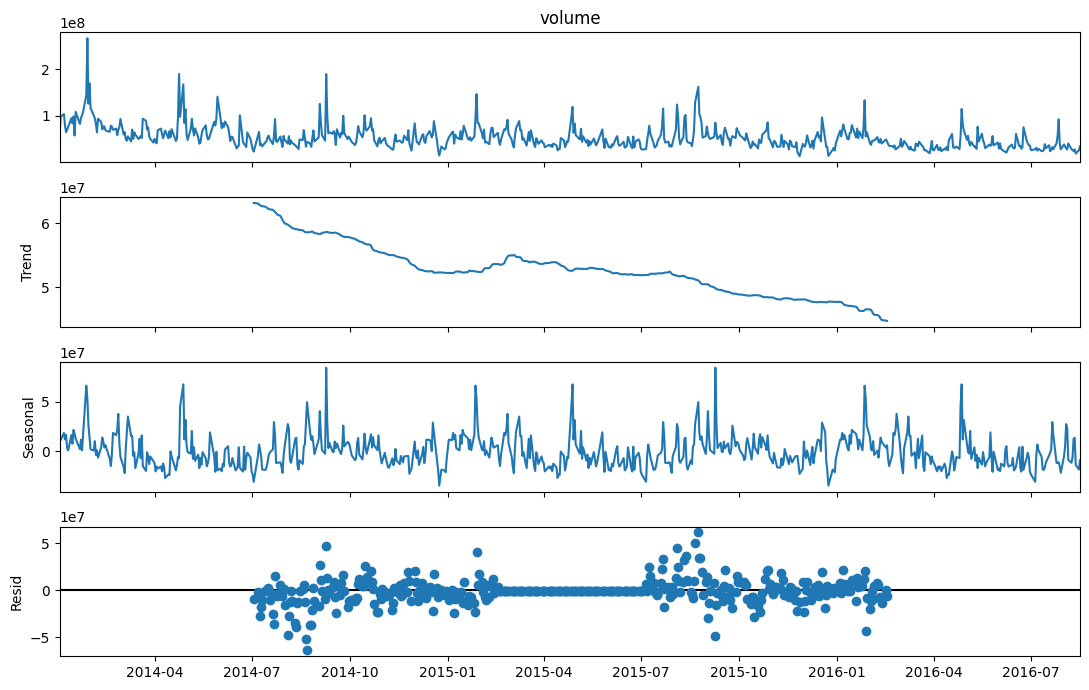

In [120]:
# decompose volume into trend,seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
appl_index = AAPL.set_index('date')['volume']
result = seasonal_decompose(appl_index,model = 'additive',period =252)
plt.rcParams['figure.figsize'] = (11,7)
result.plot()
plt.show()

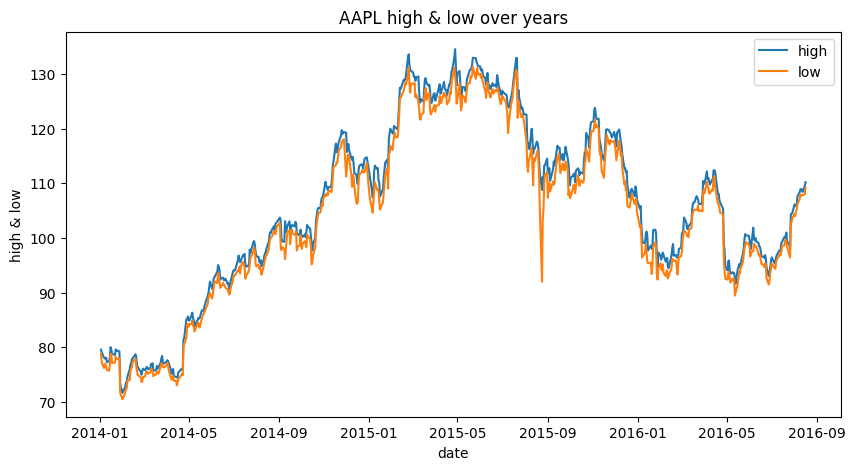

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(AAPL['date'], AAPL[['high','low']],label = ['high','low'])
ax.set_xlabel('date')
ax.set_ylabel('high & low')
ax.set_title('AAPL high & low over years')
ax.legend()

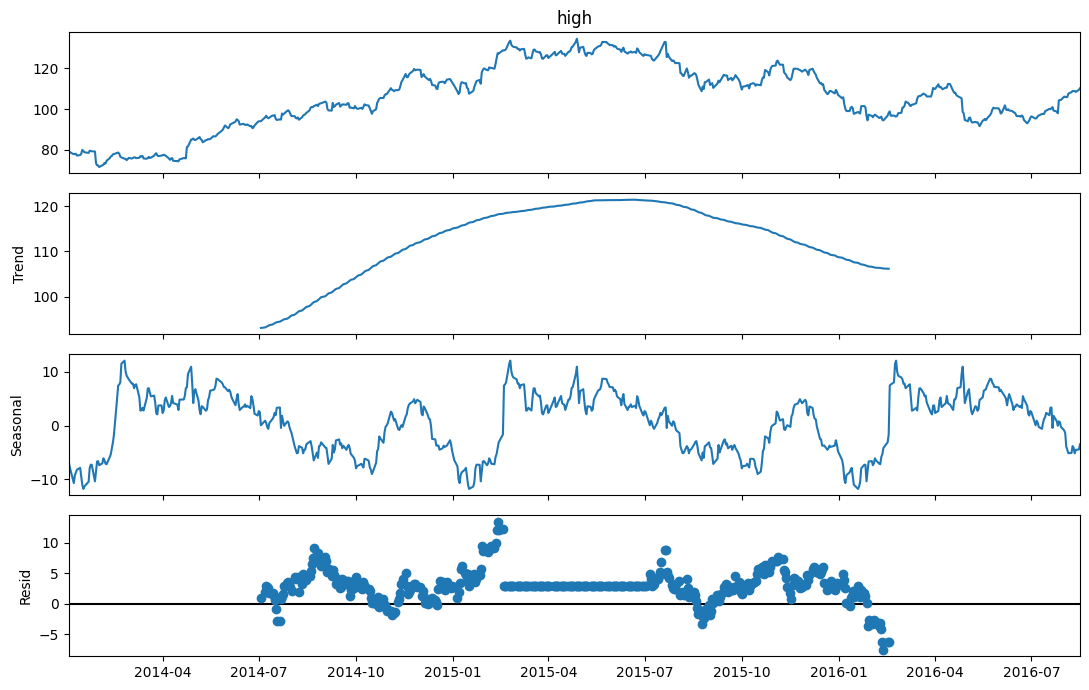

In [121]:
# decompose into trend,seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
appl_index = AAPL.set_index('date')['high']
result = seasonal_decompose(appl_index,model = 'additive',period =252)
plt.rcParams['figure.figsize'] = (11,7)
result.plot()
plt.show()

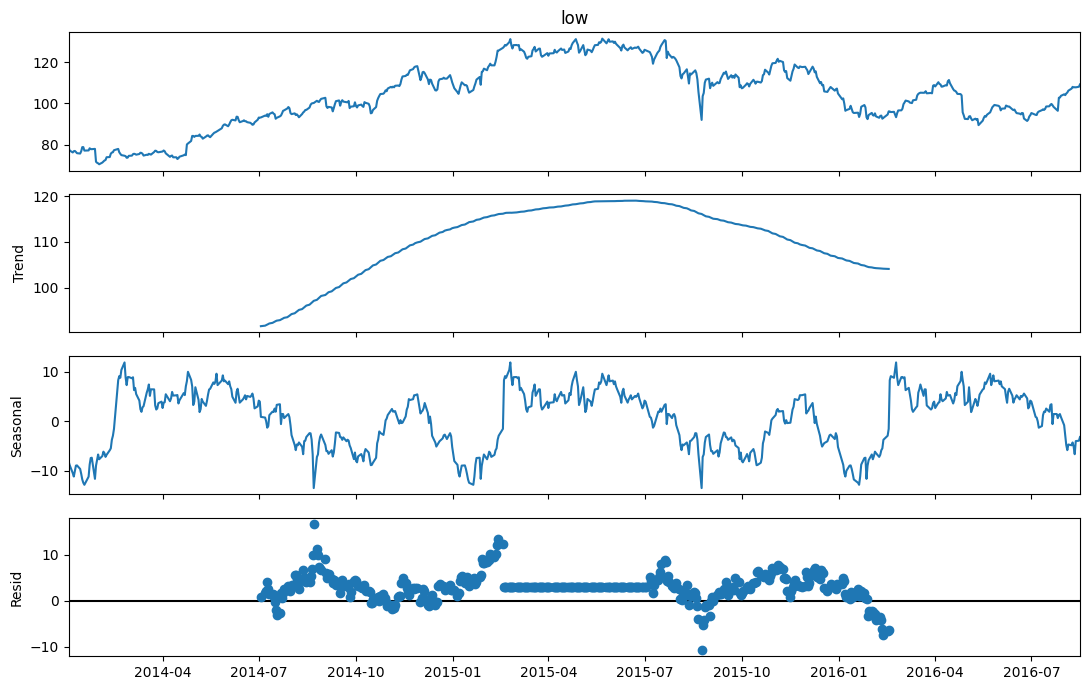

In [122]:
# decompose into trend,seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
appl_index = AAPL.set_index('date')['low']
result = seasonal_decompose(appl_index,model = 'additive',period =252)
plt.rcParams['figure.figsize'] = (11,7)
result.plot()
plt.show()

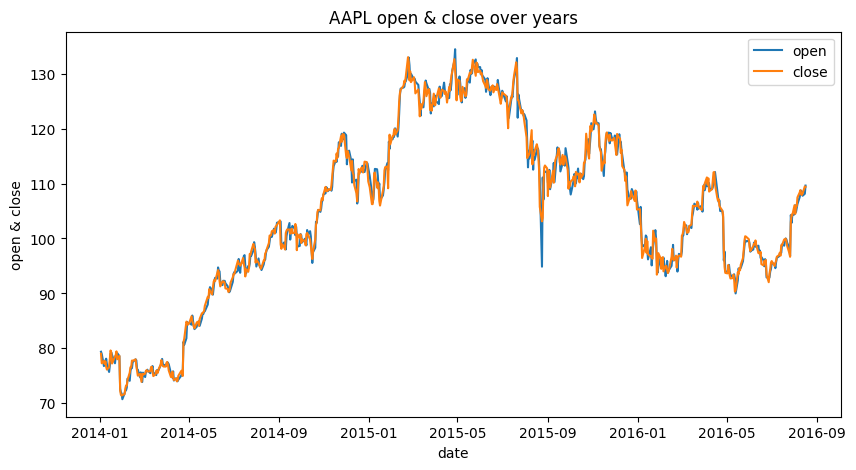

In [88]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(AAPL['date'], AAPL[['open','close']],label = ['open','close'])
ax.set_xlabel('date')
ax.set_ylabel('open & close')
ax.set_title('AAPL open & close over years')
ax.legend()

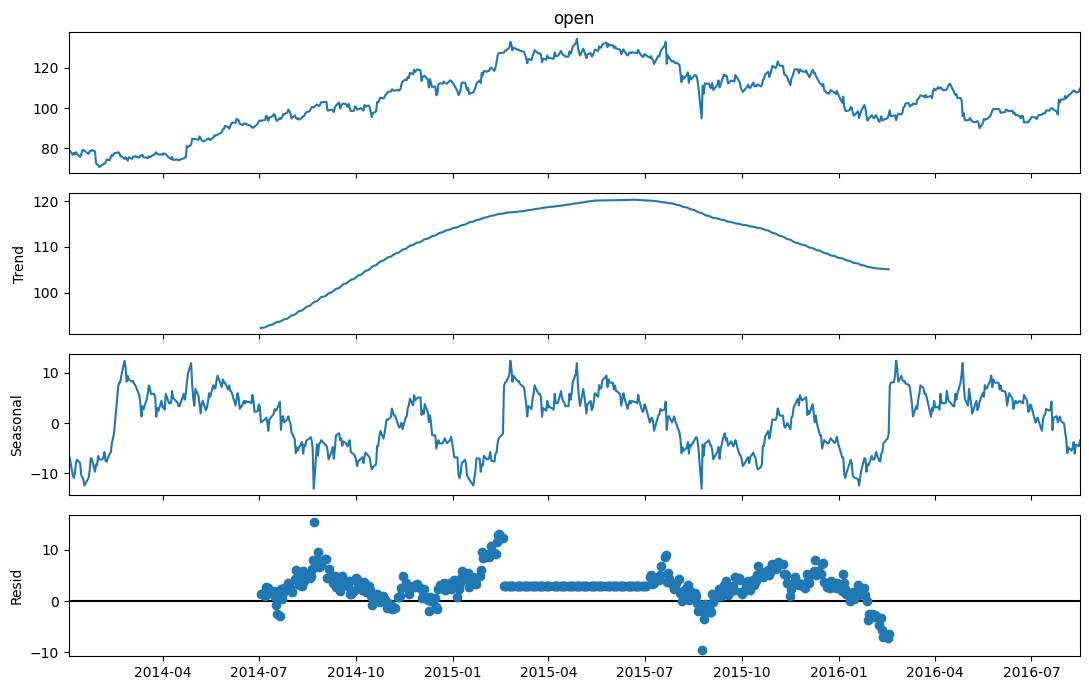

In [123]:
# decompose into trend,seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
appl_index = AAPL.set_index('date')['open']
result = seasonal_decompose(appl_index,model = 'additive',period =252)
plt.rcParams['figure.figsize'] = (11,7)
result.plot()
plt.show()

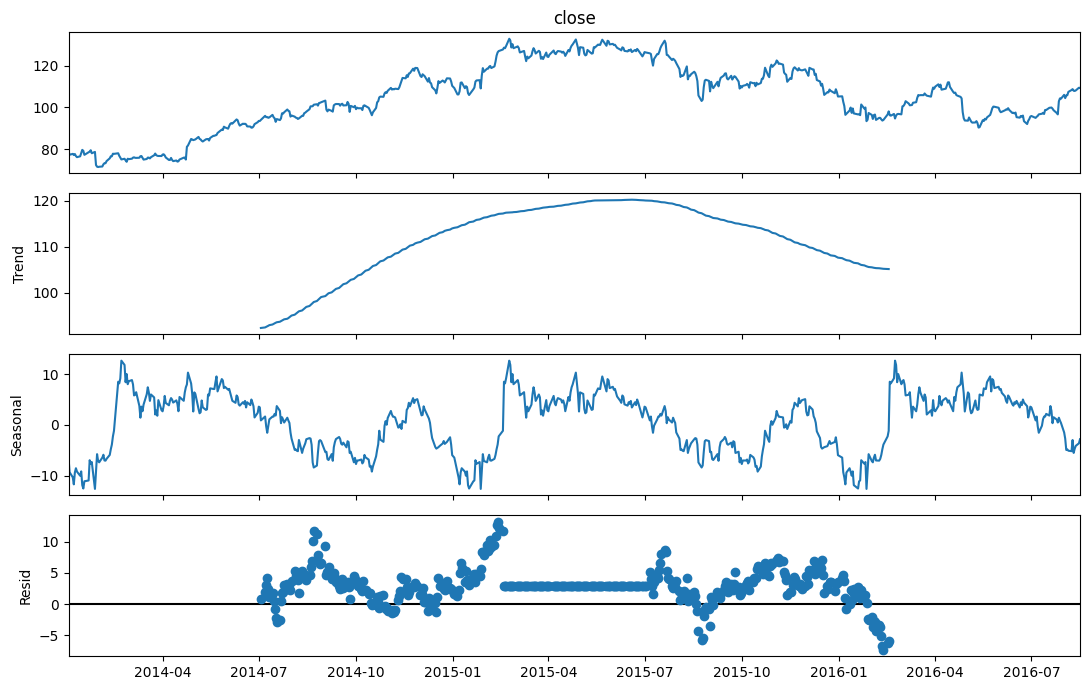

In [124]:
# decompose into trend,seasonal and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
appl_index = AAPL.set_index('date')['close']
result = seasonal_decompose(appl_index,model = 'additive',period =252)
plt.rcParams['figure.figsize'] = (11,7)
result.plot()
plt.show()

perform moving average smoothing

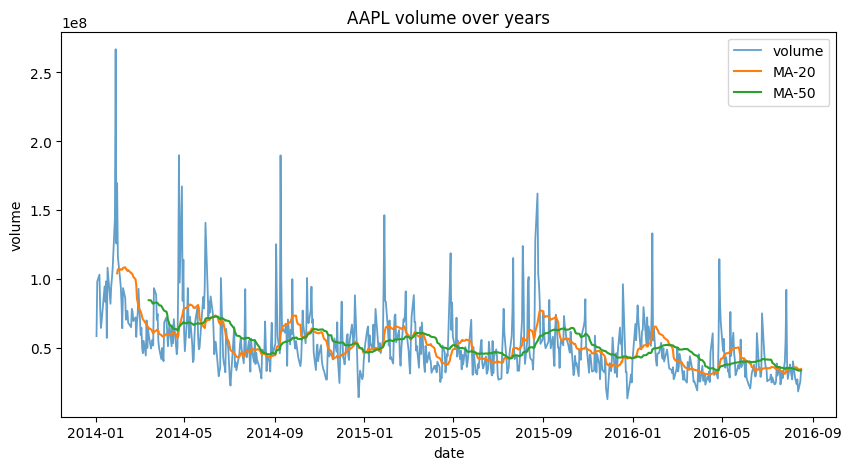

In [141]:
## perform moving average smoothing
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(AAPL['date'], AAPL['volume'],label='volume',linewidth= 1.3,alpha = 0.7)
for window in [20,50]:
  ax.plot(AAPL['date'], AAPL['volume'].rolling(window).mean(),label = f'MA-{window}')
ax.legend()
ax.set_title('AAPL volume over years')
ax.set_xlabel('date')
ax.set_ylabel('volume')
plt.show()